In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<b>Syntax</b> : *plt.bar(x, height, width, bottom, align)*

In [4]:
a=df.drop(["Department","salary"],axis="columns")
left_data= df.loc[df["left"]==1]
notleft_data = df.loc[df["left"]==0]
#We cannot use correlation here because , correlation checks if x increases , y increases or decreases but here here y is just 1 or 0; True or False.
notleft_data.drop(["Department","salary"],axis="columns").groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.66681,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251


In [5]:
left_data.drop(["Department","salary"],axis="columns").groupby("left").mean()
df.drop(["Department","salary"],axis="columns").groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [6]:
d1 = df[["left","Department"]]
#new_df = df.loc[:,['column1', 'column2']]
b=[]
d=[]
a=d1.drop_duplicates(subset="Department")["Department"].to_list()
for i in a:
    k=c=p=0
    for j in d1.Department:
        if i==j:
            if d1.iloc[k,0]==1:
                c+=1
            else:
                p+=1    
        k+=1
    b.append(c) #storing 1's
    d.append(p) #storing 0's

# print(b," \n ",d)

In [7]:
# dl1 = pd.DataFrame({"left":b,"Department":a})
# dl2 = pd.DataFrame({"not left":d,"Department":a})
dl3 = pd.DataFrame({"Department":a,"Left":b,"Not_Left":d})
dl3

,Department,Left,Not_Left
0,sales,1014,3126
1,accounting,204,563
2,hr,215,524
3,technical,697,2023
4,support,555,1674
5,management,91,539
6,IT,273,954
7,product_mng,198,704
8,marketing,203,655
9,RandD,121,666


<Axes: xlabel='Department'>

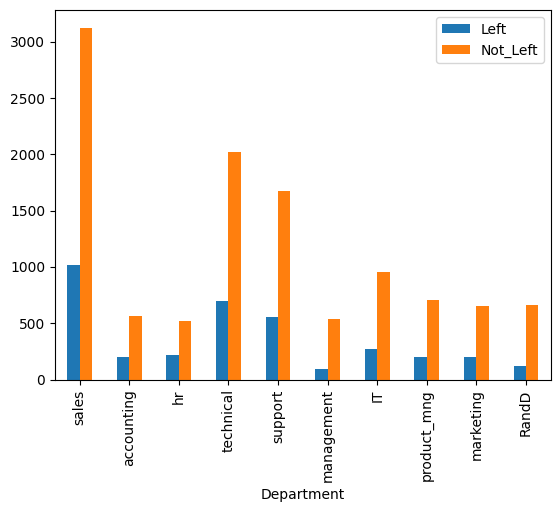

In [8]:
dl3.plot(x="Department",y=["Left","Not_Left"],kind="bar")


In [9]:
d2 = df[["left","salary"]]
#new_df = df.loc[:,['column1', 'column2']]
b=[]
d=[]
a=d2.drop_duplicates(subset="salary")["salary"].to_list()
for i in a:
    k=c=p=0
    for j in d2.salary:
        if i==j:
            if d2.iloc[k,0]==1:
                c+=1
            else:
                p+=1    
        k+=1
    b.append(c) #storing 1's
    d.append(p) #storing 0's


<Axes: xlabel='Salary'>

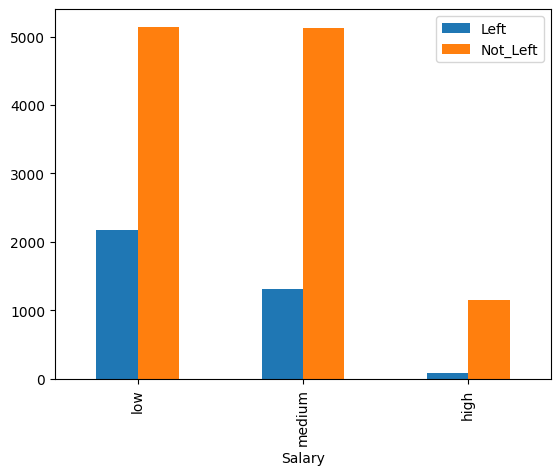

In [10]:
dff = pd.DataFrame({"Salary":a,"Left":b,"Not_Left":d})
dff.plot(x="Salary",y=["Left","Not_Left"],kind="bar")

In [11]:
d=pd.get_dummies(df.salary)
merged=pd.concat([d2,d],axis="columns")
final = merged.drop(["salary","medium"],axis="columns")
final

,left,high,low
0,1,False,True
1,1,False,False
2,1,False,False
3,1,False,True
4,1,False,True
...,...,...,...
14994,1,False,True
14995,1,False,True
14996,1,False,True
14997,1,False,True


In [12]:
model=LogisticRegression()
X=pd.concat([df[["satisfaction_level"]],df[["average_montly_hours"]],df[["promotion_last_5years"]],final.drop(["left"],axis="columns")],axis="columns")
model.fit(X,final.left)



LogisticRegression()

In [13]:
model.score(X,final.left)

0.7757850523368225

In [14]:
from sklearn.model_selection import train_test_split

trainX,testX,trainY,testY = train_test_split(X,final.left,train_size=0.8)
model.fit(trainX,trainY)

c:\Users\user\Desktop\ML Project\ml\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.score(testX,testY)


0.7663333333333333

In [ ]:
model.predict_proba(testX)

array([[0.94531483, 0.05468517],
       [0.6192279 , 0.3807721 ],
       [0.35152733, 0.64847267],
       ...,
       [0.86606218, 0.13393782],
       [0.73595369, 0.26404631],
       [0.81926542, 0.18073458]])

In [18]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()

m.fit(X,final.left)

LinearRegression()

In [21]:
print(m.coef_)
print(m.intercept_)

[-6.50077626e-01  5.37885182e-04 -1.12889357e-01 -1.23655557e-01
  7.69102632e-02]
0.5034147850068572


In [26]:
b    = (m.coef_[0]*testX["satisfaction_level"] + m.coef_[1]*testX["average_montly_hours"] + m.coef_[2]*testX["promotion_last_5years"] + m.coef_[3]*testX["high"]
        + m.coef_[4]*testX["low"] + m.intercept_)
prob = 1/(1 + np.exp(-b))

In [ ]:
prob
#This is an approximate estimation butit's not optimized with cross entropy minimization

7139     0.498589
795      0.594229
12179    0.645101
3106     0.574615
2782     0.552880
           ...   
12669    0.548489
14158    0.520646
10005    0.540753
2352     0.570299
10670    0.553840
Length: 3000, dtype: float64